## Linear Regression

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. [1](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) An option for the optimization algorithm is [Gradient Descent](url). In the basic case it has no regularization, making it susceptible to overfitting etc.

<br/><br/>

## Regularization

Adds bias to [objective function](https://en.wikipedia.org/wiki/Loss_function) model to prevent [overfitting](https://towardsdatascience.com/what-are-overfitting-and-underfitting-in-machine-learning-a96b30864690) to training data. Need for generalization of the model.

<br/><br/>

## **L1/L2 Norm**

L1 Normalization uses the manhattan distance ($L1 = \sum^N_1(\hat x - x)$, L2 uses the euclidean distance ($L2 = \sum^N_1(\hat x - x)^2$).

<br/><br/>

## Linear Regression L1 - Lasso Regression
Combats overfitting by decreasing some parameters towards 0, making them obsolete. It is a form of feature selection. The L1 norm is sparse as some input features have weights = 0, and the rest is non-zero.

Features are highly correlated in real world environments. L1 regularization would arbitrarily select only 1 of the features from the group of correlated features!

$Loss = \sum^N_1(\hat Y - Y) - \alpha \sum^N_1 w$

<br/><br/>

## **Linear Regression L2 - Ridge Regression**

Combats overfitting by forcing weights to be small, not exactly 0. The larger $\alpha$, the closer the values will be to 0, without becoming 0. L2 regularization is not robust to outliers.

$Loss = \sum^N_1(\hat Y - Y) - \alpha \sum^N_1 w^2$

<br/><br/>

## **L1 vs L2**

L1 performs a sparse feature selection and is robust to outliers
L1 uses absolute values of weights, cost increases linearly
L1 manhattan distance -> many possible solutions (non-differentiable piecewise function) -> computationally more expensive than L2
L1 if features are highly correlated L1 selects one of the correlated features arbitrarily and suppresses the others (can be disadvantageous).
L1 through feature selection reduces model complexity.

L2 squares the weights, cost increases exponentially
L2 reduces values of weights to near zero or bloats outliers -> Non-sparse
L2 euclidean distance -> one possible solution

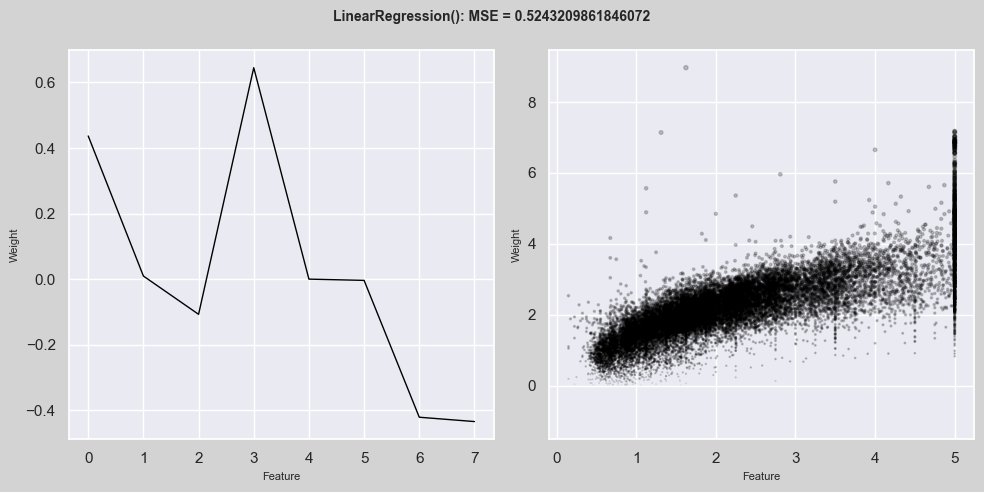

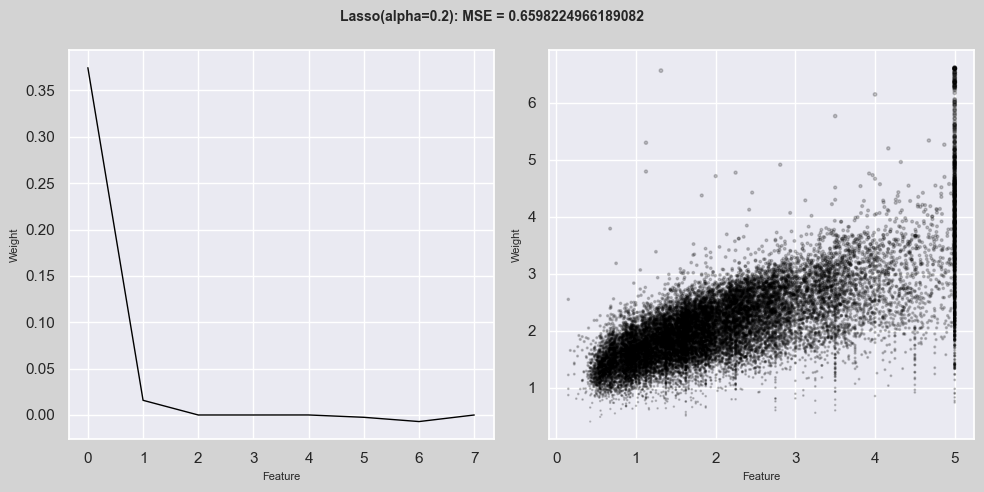

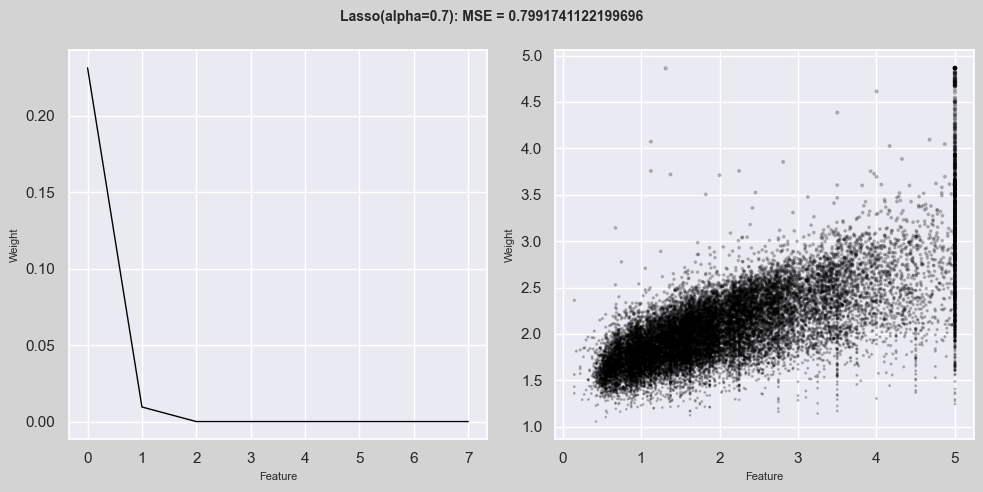

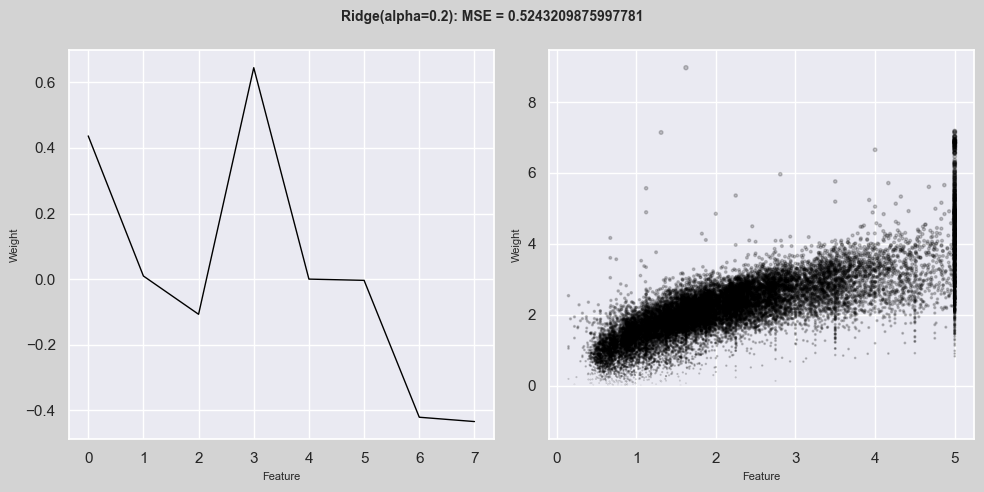

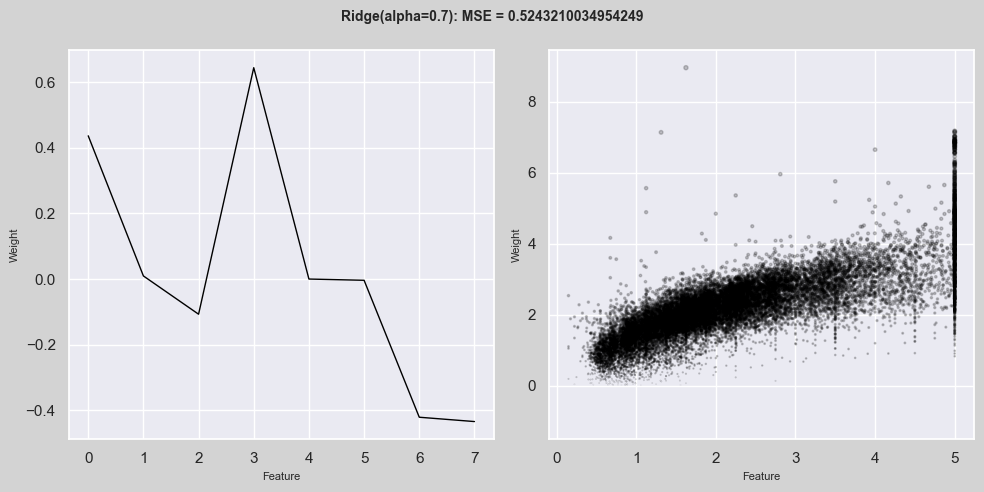

In [65]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set_theme()

# Import Dataset
california = fetch_california_housing()
X = california.data
t = california.target

def plotRegression(reg):
    reg.fit(X, t)
    y = reg.predict(X)
    w = reg.coef_
    b = reg.intercept_
    mse = mean_squared_error(t,y)
    plt.figure(figsize=(10,5), facecolor="lightgrey", layout='tight')
    plt.suptitle(f"{reg}: MSE = {mse}", size=10, weight="bold")
    plt.subplot(121,)
    plt.xlabel("Feature", size=8)
    plt.ylabel("Weight", size=8)
    
    plt.plot(w, linewidth=1, color="black")
    plt.subplot(122)
    plt.xlabel("Feature", size=8)
    plt.ylabel("Weight", size=8)
    plt.scatter(t, y, s=y, color="black", alpha=0.2)
    plt.show()
    
plotRegression(LinearRegression())
plotRegression(Lasso(alpha=0.2))
plotRegression(Lasso(alpha=0.7))
plotRegression(Ridge(alpha=0.2))
plotRegression(Ridge(alpha=0.7))
